In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
print(f"torch version: {torch.__version__}")

torch version: 2.6.0


<h1>Converting Images to batched tensors</h1>

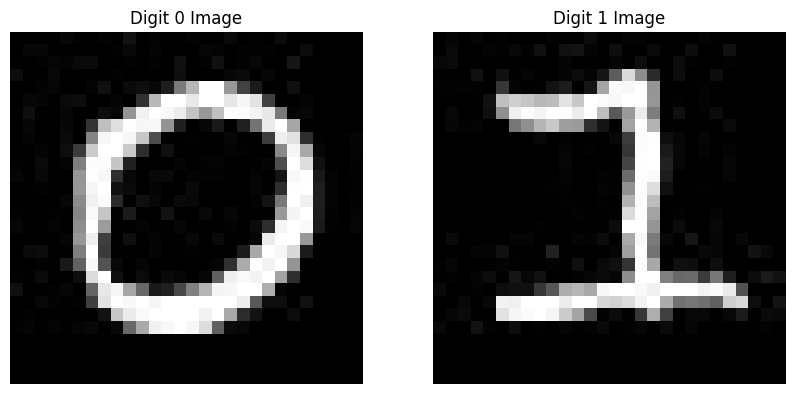

In [5]:
digit_0_array_og = cv2.imread("mnist_0.jpg")
digit_1_array_og = cv2.imread("mnist_1.jpg")

digit_0_array_gray = cv2.imread("mnist_0.jpg", cv2.IMREAD_GRAYSCALE)
digit_1_array_gray = cv2.imread("mnist_1.jpg", cv2.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(digit_0_array_og, cmap='gray', interpolation='none')
axs[0].set_title("Digit 0 Image")
axs[0].axis("off")

axs[1].imshow(digit_1_array_og, cmap='gray', interpolation='none')
axs[1].set_title("Digit 1 Image")
axs[1].axis("off")

plt.show()

In [6]:
print("Image array shape: ", digit_0_array_og.shape)
print(f"Min pixel value: {np.min(digit_0_array_og)}; Max pixel value: {np.max(digit_0_array_og)}")

Image array shape:  (28, 28, 3)
Min pixel value: 0; Max pixel value: 255


In [8]:
digit_0_array_gray

array([[  0,   0,   0,   0,   7,   1,   0,   3,   0,  18,   0,   3,   0,
          0,   3,   0,   0,   9,   0,   2,   0,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   7,   7,   0,   0,   0,   0,   0,   2,   8,   0,   4,   0,
          0,   0,   6,   4,   0,   2,   3,   2,   0,   0,  11,   0,   0,
          0,   0],
       [  1,   0,   2,   6,   4,   9,   9,   0,   0,   2,   0,   3,   1,
         15,   0,   2,  16,   0,   2,   7,   0,   0,  22,   0,   0,   0,
          0,   0],
       [ 12,   0,   0,   8,   1,   0,   0,   0,   2,   0,   0,   0,   0,
         14,   0,   0,   0,   7,   9,   0,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   3,   5,   0,   0,   4,  16,   0,  10,  14,   6,  29,
        122, 182, 255, 255, 152,  66,  26,   0,   0,  15,   0,   0,   0,
          0,   0],
       [  0,   7,   5,   0,   9,  12,   0,   0,   4,   0,  49, 184, 255,
        255, 232, 255, 255, 231, 246, 227,  64,   0,   0,   4,   0,   0,
          0,   0],
       [  

<h3>1.1. Convert numpy array to torch tensors</h3>

Shape of normalised digit 0 tensor:  torch.Size([28, 28, 3])
Normalised min pixel value: 0.0; Normalised max pixel value: 1.0


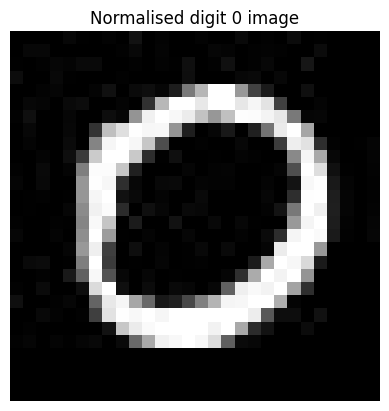

In [11]:
img_tensor_0 = torch.tensor(digit_0_array_og, dtype=torch.float32) / 255.0
img_tensor_1 = torch.tensor(digit_1_array_og, dtype=torch.float32) / 255.0

print("Shape of normalised digit 0 tensor: ", img_tensor_0.shape)
print(f"Normalised min pixel value: {torch.min(img_tensor_0)}; Normalised max pixel value: {torch.max(img_tensor_0)}")

plt.imshow(img_tensor_0, cmap="gray")
plt.title("Normalised digit 0 image")
plt.axis("off")
plt.show()

<h3>1.2. Creating input batch</h3>

In [12]:
batch_tensor = torch.stack([img_tensor_0, img_tensor_1])
print("batch tensor shape: ", batch_tensor.shape)

batch tensor shape:  torch.Size([2, 28, 28, 3])


Convert convetion fron [N, H, W, C] to [N, C, H, W] to follow pytorch shape convention

In [40]:
batch_input = batch_tensor.permute(0, 3, 1, 2)
# batch_input = batch_tensor.view(2, 3, 28, 28)
print("Batch tensor shape: ", batch_input.shape)

Batch tensor shape:  torch.Size([2, 3, 28, 28])


<h1>2. Introduction to Tensors and its Operation</y2>

<h3>2.1. Construct your first tensor</h3>

In [14]:
a = torch.ones(5)
print(a)

b = torch.zeros(5)
print(b)

tensor([1., 1., 1., 1., 1.])
tensor([0., 0., 0., 0., 0.])


In [15]:
c = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
print(c)

tensor([1., 2., 3., 4., 5.])


In [16]:
c1 = torch.tensor([[1.], [2.], [3.], [4.], [5.]])
print(c1)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])


In [17]:
d = torch.zeros(3, 2)
print(d)

e = torch.ones(3, 2)
print(e)

f = torch.tensor([[1., 2.], [3., 4.]])
print(f)

g = torch.tensor([[[1., 2.], [3., 4.]], [[5., 6.], [7., 8.]]])
print(g)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


In [18]:
print(f.shape)
print(g.shape)
print(e.shape)

torch.Size([2, 2])
torch.Size([2, 2, 2])
torch.Size([3, 2])


<h3>2.2. Accessing an element in Tensor</h3>

In [19]:
print(c[2])

tensor(3.)


In [21]:
print(f[1, 0])
print(f[1][0])
print(g[1,0,0])
print(g[1][0][0])

tensor(3.)
tensor(3.)
tensor(5.)
tensor(5.)


<h3>2.3. Specify data type of elements</h3>

In [24]:
int_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(int_tensor.dtype)

int_tensor = torch.tensor([[1, 2, 3], [4., 5, 6]])
print(int_tensor.dtype)
print(int_tensor)

float_tensor = torch.tensor([[1, 2, 3], [4.5, 5, 6]])
int_tensor = float_tensor.type(torch.int64)
print(int_tensor.dtype)
print(int_tensor)

torch.int64
torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


<h3>2.4. Tensor to/from NumPy Array</h3>

In [46]:
f_numpy = f.numpy()
print(f_numpy)

h = np.array([[8, 7,6,5], [4,3,2,1]])
h_tensor = torch.from_numpy(h)
h[0] = [1, 2, 3, 4]
print(h_tensor)
print(h)


[[1. 2.]
 [3. 4.]]
tensor([[1, 2, 3, 4],
        [4, 3, 2, 1]])
[[1 2 3 4]
 [4 3 2 1]]


<h3>2.5. Arithmetic Operations on Tensors</h3>

In [26]:
tensor1 = torch.tensor([[1, 2, 3], [4, 5,6]])
tensor2 = torch.tensor([[-1, 2, -3], [4, -5,6]])

print(tensor1 + tensor2)
print(torch.add(tensor1, tensor2))

print(tensor1 - tensor2)
print(torch.sub(tensor1, tensor2))

print(tensor1 * 2)

print(tensor1 * tensor2)

tensor3 = torch.tensor([[1, 2], [3, 4], [5, 6]])
print(torch.mm(tensor1, tensor3))

print(tensor1/2)

print(tensor1/tensor2)


tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
tensor([[ -1,   4,  -9],
        [ 16, -25,  36]])
tensor([[22, 28],
        [49, 64]])
tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])
tensor([[-1.,  1., -1.],
        [ 1., -1.,  1.]])


<h3>2.6. Boardcasting</h3>

In [32]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4])

result = b + a
print("Result of broadcasting:\n", result)

Result of broadcasting:
 tensor([5, 6, 7])


In [35]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([[4], [5], [6]])

result = a + b
print("Result of broadcasting:\n", result)

Result of broadcasting:
 tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])


<h3>2.7. CPU v/s GPU Tensor</h3>

In [37]:
tensor_cpu = torch.tensor([[1., 2.,], [3., 4.], [5., 6.]], device='cpu')
# tensor_gpu = torch.tensor([[1., 2.,], [3., 4.], [5., 6.]], device='cuda')


In [47]:
 a = torch.tensor([[1, 2], [3, 4]])
 b = torch.tensor([[5, 6], [7, 8]])
 c = torch.tensor([[2, 2], [2, 2]])
 d = a + b
 e = d * c

In [48]:
print(d, e)

tensor([[ 6,  8],
        [10, 12]]) tensor([[12, 16],
        [20, 24]])


In [49]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])
c = torch.tensor([[2], [2]])
d = a + b
e = d * c

In [50]:
print(d)
print(e)

tensor([[ 6,  8],
        [10, 12]])
tensor([[12, 16],
        [20, 24]])
